In [1]:
from haar import haar
from pi2 import pi2 
from pi1 import pi1

import numpy as np 

from scipy import integrate
import scipy
from scipy.linalg import lstsq, solve

import matplotlib as mpl
import matplotlib.pyplot as plt 

from numba import njit, prange

mpl.style.use('seaborn')

In [2]:
# y''(x) = -2 y(x) y'(x); y(0) = 0, y'(0) = -1
#@njit(parallel=True)
# TODO add visualization of collocation points as meshgrid thingie - https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html (coord ex)
def wavelet_solve(J): 
    N = 2**(J + 1) 
    j = np.arange(0, N)
    x = (j - 0.5) / N

    alpha1 = 0.
    beta1 = -1.
    a1 = beta1 - alpha1 

    W = np.zeros((N, N)) 
    f = np.zeros((N, )) 
    a = np.zeros((N, ))

    eps = 1.e-6
    r = np.ones((N, 1))

    iter_idx = 0 

    while max(r) > eps: 
        #for j in range(N): 
        #    H = P1 = P2 = 0 
        H = np.zeros((N, ))
        P1 = np.zeros((N, ))
        P2 = np.zeros((N, ))

        for i in prange(N): 
            H += a[i] * haar(x, i+1, J) 
            P1 += a[i] * pi1(x, i+1, J)             
            P2 += a[i] * pi2(x, i+1, J) 

        #print(H.shape, P1.shape, P2.shape)
        #print(f.shape)
        f = 2 * (alpha1 + beta1 * x + P2) * (beta1 + P1) + H 
        #print(f.shape)

        for k in prange(N): 
            W[:, k] = 2 * pi2(x, k+1, J) * (beta1 + P1) + 2 * (alpha1 + beta1 + x + P2) * pi1(x, k+1, J)  + haar(x, k+1, J) 

        #print(W.shape, (W@a).shape, f.shape)
        a_new = np.linalg.pinv(W) @ (W@a - f)
        #print(np.linalg.pinv(W).shape, (W@a - f).shape)
        #print(a_new.shape)
        #a_new = lstsq(W, W@a - f, cond=None)[0]
        #a_new = solve(W, W@a - f) # singularities 
        #a_new = scipy.linalg.inv(W) @ (W@a - f)
        #print(a_new.shape)
        r = np.abs(a_new - a) 
        #print(r.shape)
        print(max(r)) 

        a = a_new 
        iter_idx += 1


    y = np.zeros((N, ))
    S = np.zeros((N, ))

    for i in range(N): 
        S += a[i] * pi2(x, i+1, J)

    y = alpha1 + x * beta1 + S 

    return y, x


In [ ]:
def wavelet_solve_ex6(J): 
    N = 2**(J + 1) 
    j = np.arange(0, N)
    x = (j - 0.5) / N

    alpha1 = 0.
    beta1 = -1.
    a1 = beta1 - alpha1 

    W = np.zeros((N, N)) 
    f = np.zeros((N, )) 
    a = np.zeros((N, ))

    eps = 1.e-6
    r = np.ones((N, 1))

    iter_idx = 0 

    while max(r) > eps: 
        #for j in range(N): 
        #    H = P1 = P2 = 0 
        H = np.zeros((N, ))
        P1 = np.zeros((N, ))
        P2 = np.zeros((N, ))

        for i in prange(N): 
            H += a[i] * haar(x, i+1, J) 
            P1 += a[i] * pi1(x, i+1, J)             
            P2 += a[i] * pi2(x, i+1, J) 

        #print(H.shape, P1.shape, P2.shape)
        #print(f.shape)
        f = 2 * (alpha1 + beta1 * x + P2) * (beta1 + P1) + H 
        #print(f.shape)

        for k in prange(N): 
            W[:, k] = 2 * pi2(x, k+1, J) * (beta1 + P1) + 2 * (alpha1 + beta1 + x + P2) * pi1(x, k+1, J)  + haar(x, k+1, J) 

        #print(W.shape, (W@a).shape, f.shape)
        a_new = np.linalg.pinv(W) @ (W@a - f)
        #print(np.linalg.pinv(W).shape, (W@a - f).shape)
        #print(a_new.shape)
        #a_new = lstsq(W, W@a - f, cond=None)[0]
        #a_new = solve(W, W@a - f) # singularities 
        #a_new = scipy.linalg.inv(W) @ (W@a - f)
        #print(a_new.shape)
        r = np.abs(a_new - a) 
        #print(r.shape)
        print(max(r)) 

        a = a_new 
        iter_idx += 1


    y = np.zeros((N, ))
    S = np.zeros((N, ))

    for i in range(N): 
        S += a[i] * pi2(x, i+1, J)

    y = alpha1 + x * beta1 + S 

    return y, x


In [3]:
def L2_error(approx, exact): 
    return np.sqrt(1 / len(approx) * np.sum((exact-approx)**2)) 

def _integrator(t, Y): 
    return [Y[1], -2*Y[0]*Y[1]]

In [7]:
J = 8
N = 2**(J + 1) 
j = np.arange(0, N)
x = (j - 0.5) / N

y, x = wavelet_solve(J) 

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'haar':[0m [1m[1mCannot determine Numba type of <class 'function'>[0m
[1m
File "../../../../tmp/ipykernel_209927/2750145514.py", line 28:[0m
[1m<source missing, REPL/exec in use?>[0m
[0m

In [168]:
yexact = - np.tan(x) 
L2_error(y, yexact)

5.40188012069045e-06

In [173]:
yexact = - np.tan(x) 
L2_error(y, yexact)

1.3643004767840866e-06

In [140]:
x.shape

(256,)

In [4]:
#fig, ax = plt.figure(figsize=(8, 8))

l2_errors = {"RK23": [], "RK45": [], "BDF": [], "LSODA": [], "Radau": []}
l2_wavelets = []
JMAX = 9

for J in range(1, JMAX): 
    y, x = wavelet_solve(J) 

    yexact = - np.tan(x) 

    l2_wavelet = L2_error(y, yexact)
    l2_wavelets.append(l2_wavelet)
    #ax.plot()  

    for method in ["RK23", "RK45", "BDF", "LSODA", "Radau"]:

        integrator_soln = integrate.solve_ivp(_integrator, t_span=[min(x), max(x)], t_eval=x, y0=[0, -1], method=method) # , t_eval=x
        #integrator_soln = integrate.solve_ivp(_integrator, t_span=[0, 1], y0=[0, -1], method=method)
        #print(integrator_soln.t.shape)
        y_exactfull = -np.tan(integrator_soln.t)
#        err = L2_error(yexact, integrator_soln.y[0, :])
        err = L2_error(y_exactfull, integrator_soln.y[0, :])
        l2_errors[method].append(err)



#plt.legend() 
#plt.title("asdf")
    #plt.plot(x, integrator_soln[:,0])
    #plt.plot(x, integrator_soln2.y[0,:])


0.9985791072470034
0.18569165484283634
0.02255954930820714
0.004083422765088551
0.0008688054887087127
0.0002015314968588089
4.914097489061575e-05
1.1943746257792043e-05
2.9369485474717294e-06
7.196143259058374e-07
1.2947689894170527
0.4791238952313336
0.08656577659943765
0.010916153607159251
0.0010508745616775172
0.00010233722282126934
8.447596741456564e-06
8.037977143882102e-07
1.4000387775935448
0.8985271372922554
0.20164412292959755
0.02877314224050964
0.0035736835619349927
0.00034233788885085215
2.8984394100928235e-05
2.1457028270832623e-06
1.507471212303102e-07
1.4322930639821194
1.0944642809789709
0.31636078416332236
0.05558901439729058
0.006908358855294061
0.0006592132278917529
5.285416761169337e-05
3.7974886092362325e-06
2.557170909467388e-07
1.441620683074156
1.170012578872569
0.3843113620189573
0.06954552978605322
0.008927726761462695
0.000990446328732797
8.867675017598664e-05
6.671556566639758e-06
4.342804803547651e-07
1.4442454613966924
1.196086240470772
0.410447684724381
0

In [111]:
l2_errors

{'RK23': [0.14879357857660816,
  0.08519538057892856,
  0.048187044925226054,
  0.02674999376190252,
  0.013137027688022577],
 'RK45': [0.149578757334162,
  0.08469501215483421,
  0.04683464206431483,
  0.025010367209901668,
  0.013020456688969654],
 'BDF': [0.14142125320786275,
  0.07945077975752696,
  0.045258240089338965,
  0.026582889370157823,
  0.014688301418387202],
 'LSODA': [0.140175829894863,
  0.07672786565975996,
  0.04281537953592106,
  0.022370373909096016,
  0.011777101740468716]}

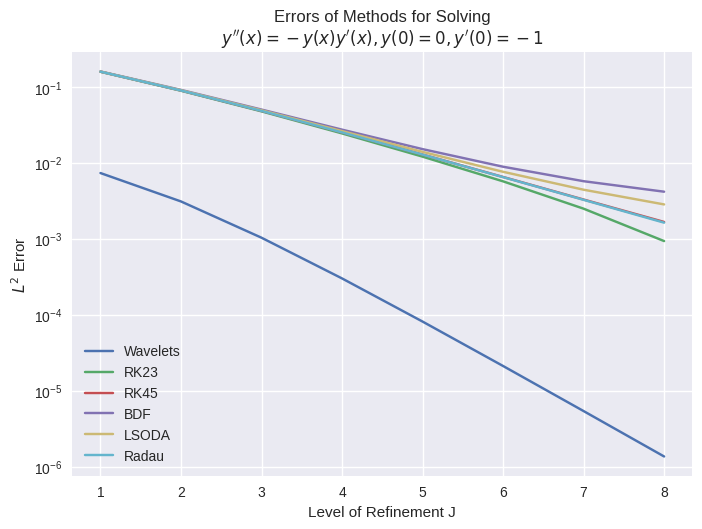

In [5]:
plt.plot(range(1, JMAX), l2_wavelets, label="Wavelets")

for k, v in l2_errors.items(): 
    plt.plot(range(1, JMAX), v, label=k)

plt.title(rf"Errors of Methods for Solving" +"\n" + rf"$y''(x) = - y(x) y'(x), y(0) = 0, y'(0) = -1$")
plt.yscale("log")
plt.xticks(range(1, JMAX))
plt.xlabel("Level of Refinement J")
plt.ylabel("$L^2$ Error")
plt.legend()

In [89]:
# y''(x) = -2 y(x) y'(x), y(0) = 0, y'(0) = -1 NOT A PAPER EXAMPLE! 
# y(x) = -tan(x) 
J = 1
N = 2**(J + 1) 
j = np.arange(0, N)
x = (j - 0.5) / N

alpha1 = 0.
beta1 = -1.
a1 = beta1 - alpha1 

W = np.zeros((N, N)) 
f = np.zeros((N, )) 
a = np.zeros((N, ))

eps = 1.e-9
r = np.ones((N, 1))

iter_idx = 0 

while max(r) > eps: 
    #for j in range(N): 
    #    H = P1 = P2 = 0 
    H = np.zeros((N, ))
    P1 = np.zeros((N, ))
    P2 = np.zeros((N, ))
    
    for i in range(N): # things should start @ 1
        H += a[i] * haar(x, i+1, J) 
        P1 += a[i] * pi1(x, i+1, J)             
        P2 += a[i] * pi2(x, i+1, J) 

    #print(H.shape, P1.shape, P2.shape)
    #print(f.shape)
    f = 2 * (alpha1 + beta1 * x + P2) * (beta1 + P1) + H 
    #print(f.shape)

    for k in range(N): 
        W[:, k] = 2 * pi2(x, k+1, J) * (beta1 + P1) + 2 * (alpha1 + beta1 + x + P2) * pi1(x, k+1, J)  + haar(x, k+1, J) 

    #print(W.shape, (W@a).shape, f.shape)
    a_new = lstsq(W, W@a - f, cond=None)[0]
    #print(a_new.shape)
    r = np.abs(a_new - a) 
    #print(r.shape)
    print(max(r)) 

    a = a_new 
    iter_idx += 1


y = np.zeros((N, ))
S = np.zeros((N, ))

for i in range(N): 
    S += a[i] * pi2(x, i+1, J)

y = alpha1 + x * beta1 + S 

yexact = - np.tan(x) 

0.998579107247003
0.18569165484283578
0.02255954930820714
0.0040834227650896615
0.0008688054887087127
0.00020153149685908645
4.914097489194802e-05
1.194374625668182e-05
2.936948547249685e-06
7.196143270160604e-07
1.765131627529115e-07
4.328233327299813e-08
1.0614214396298394e-08
2.6028670330191517e-09
6.382934181203836e-10


In [82]:
def _integrator(Y, t): 
    return [Y[1], -2*Y[0]*Y[1]]
def _integrator2(t, Y): 
    return [Y[1], -2*Y[0]*Y[1]]

In [63]:
x

array([-0.03125,  0.03125,  0.09375,  0.15625,  0.21875,  0.28125,
        0.34375,  0.40625,  0.46875,  0.53125,  0.59375,  0.65625,
        0.71875,  0.78125,  0.84375,  0.90625])

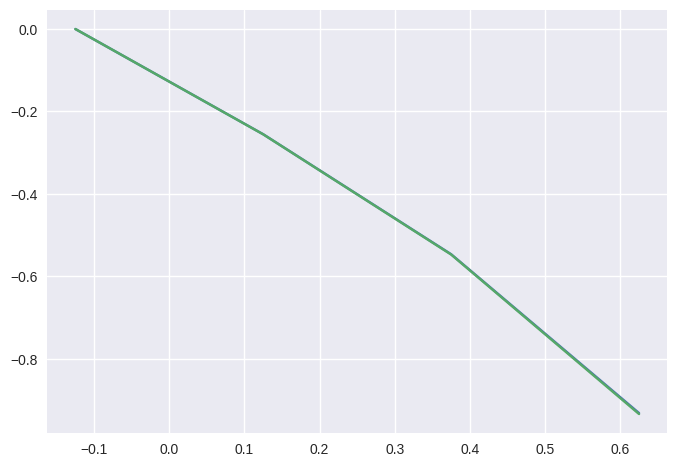

In [90]:
integrator_soln = integrate.odeint(_integrator, [0, -1], x) # , x
integrator_soln2 = integrate.solve_ivp(_integrator2, t_span=[min(x), max(x)], t_eval=x, y0=[0, -1], method='BDF') # , t_eval=x
plt.plot(x, integrator_soln[:,0])
plt.plot(x, integrator_soln2.y[0,:])


In [92]:
def L2_error(approx, exact): 
    return np.sqrt(1 / len(approx) * np.sum((exact-approx)**2)) 

In [94]:
L2_error(y, yexact), L2_error(y, integrator_soln[:, 0])

(0.007329008528579168, 0.1520280812233726)

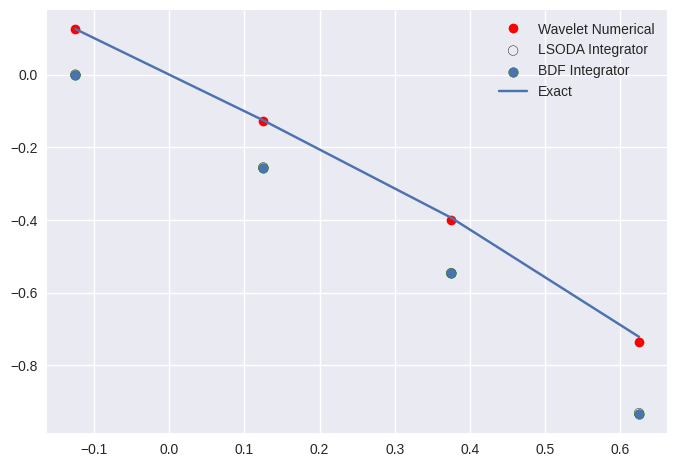

In [91]:
#plt.plot(x, y, marker='.',  markerfacecolor='white', markersize=24, label="Wavelet Numerical")
#plt.scatter(x, y, facecolors='none', edgecolors='r', label="Wavelet Numerical")
plt.plot(x, y, 'ro', label="Wavelet Numerical")
plt.scatter(x, integrator_soln[:,0], facecolors='none', edgecolors='k',  label="LSODA Integrator")
plt.scatter(integrator_soln2.t, integrator_soln2.y[0,:],  edgecolors='g', label="BDF Integrator")
plt.plot(x, yexact, label="Exact")
plt.legend()

In [15]:
x.reshape(N, 1)


array([[-0.03125],
       [ 0.03125],
       [ 0.09375],
       [ 0.15625],
       [ 0.21875],
       [ 0.28125],
       [ 0.34375],
       [ 0.40625],
       [ 0.46875],
       [ 0.53125],
       [ 0.59375],
       [ 0.65625],
       [ 0.71875],
       [ 0.78125],
       [ 0.84375],
       [ 0.90625]])

In [17]:
x[9]

0.53125

In [ ]:
y = np.zeros((N, 1)) 

for j in range(N): 
    S = 0 
    for i in range(N): 
        S += a[i] * pi2(x[j], i, J) 
    
    y[j] = alpha1 * x[j] * beta1 + S